In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [2]:
import os
import ultralytics
ultralytics.checks()
from ultralytics import YOLO, settings


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/107.7 GB disk)


In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
model = YOLO('yolo11s.pt')

In [5]:
!yolo settings

JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/drive/MyDrive/IndustrialAI/Split_Dataset",
  "weights_dir": "/content/drive/MyDrive/IndustrialAI/weights",
  "runs_dir": "/content/drive/MyDrive/IndustrialAI/runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": false,
  "hub": false,
  "mlflow": true,
  "neptune": false,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [6]:
settings.update({"datasets_dir": "/content/drive/MyDrive/IndustrialAI/Split_Dataset"})
settings.update({"weights_dir":"/content/drive/MyDrive/IndustrialAI/weights"})
settings.update({"runs_dir":"/content/drive/MyDrive/IndustrialAI/runs"})
settings.update({"neptune":False})
settings.update({"dvc":False})
settings.update({"hub":False})
settings.update({"tensorboard":True})


In [7]:
!yolo settings

JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/drive/MyDrive/IndustrialAI/Split_Dataset",
  "weights_dir": "/content/drive/MyDrive/IndustrialAI/weights",
  "runs_dir": "/content/drive/MyDrive/IndustrialAI/runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": false,
  "hub": false,
  "mlflow": true,
  "neptune": false,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [8]:
!nvidia-smi

Thu Sep 25 22:09:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P8             13W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/drive/MyDrive/IndustrialAI/dataset.yaml epochs=100 augment=True device=0 batch=-1 workers=2 imgsz=720 plots=True save_period=5 save=True multi_scale=True dropout = 0.3 val=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/IndustrialAI/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=720, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=True, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

In [5]:
!yolo predict model=/content/drive/MyDrive/IndustrialAI/Split_Dataset/runs/detect/train2/weights/best.pt source=/content/image_2025-09-25_234816471.png show=True show_labels=False show_conf=False

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,425,571 parameters, 0 gradients, 21.4 GFLOPs

image 1/1 /content/image_2025-09-25_234816471.png: 448x640 2 Gate_Valves, 2 Control_Valves, 4 Flow_Arrows, 6 Instrument_Fields, 1 Instrument_Panel, 425.2ms
Speed: 15.6ms preprocess, 425.2ms inference, 34.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


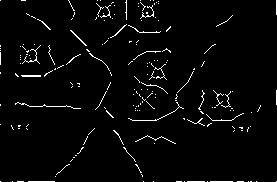

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/detect/predict/image_2025-09-25_234816471.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

cv2_imshow(skel)
cv2.waitKey(0)
cv2.destroyAllWindows()